In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pylab as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
'''
input type: list
in list, each element has pandas dataframe type is requirement
'''
def Sensor_By_Unit_Viualization(DATA):
    n_fig = len(DATA)
    for name in (col_name[5:]):
        fig, ax = plt.subplots(n_fig)
        fig.set_size_inches(32, 3)   
        for i, data in tqdm(enumerate(DATA)):
            for j in range(100):
                bool_mask = data['unit number'] == (j+1)
                T = len(data[bool_mask][name])
                t = np.arange(T)
                ax[i].plot(t, data[bool_mask][name])
                ax[i].set_title(f"grouped by unit number 1 to 100 - train{i} {name}")

        plt.show()

In [3]:
path = '/media/yongkp/CMAPSSData'

train_path_list = sorted(glob(path + '/train*'))
test_path_list = sorted(glob(path + '/test*'))
rul_path_list = sorted(glob(path + '/RUL*'))

In [4]:
col_name = ['unit number', 'time', 'op1', 'op2', 'op3']
temp = ['sensor %d'%(i+1) for i in range(23)]

load_col_name = col_name + temp
col_name = load_col_name[:-2]

In [5]:
train = []
for t_path in train_path_list:
    temp = pd.read_table(t_path, sep = ' ', header = None, names=load_col_name)
    train.append(temp[col_name])

test = []
for t_path in test_path_list:
    temp = pd.read_table(t_path, sep = ' ', header = None, names=load_col_name)
    test.append(temp[col_name])
    
RUL = []
for r_path in rul_path_list:
    temp = pd.read_table(r_path, header = None, names = ['RUL'])
    RUL.append(temp)

In [6]:
trains = pd.concat(train, axis = 0)
trains = trains.iloc[:,[2,3]]

tests = pd.concat(test, axis = 0)
tests = tests.iloc[:,[2,3]]

kmeans = KMeans(n_clusters=6, random_state=0).fit(trains)

In [7]:
train0 = kmeans.predict(train[0].iloc[:,[2,3]])
train1 = kmeans.predict(train[1].iloc[:,[2,3]])
train2 = kmeans.predict(train[2].iloc[:,[2,3]])
train3 = kmeans.predict(train[3].iloc[:,[2,3]])

In [8]:
bool_mask1 = (train1 == 2)
bool_mask3 = (train3 == 2)

new_train1 = train[1][bool_mask1]
new_train3 = train[3][bool_mask3]

In [9]:
train_cluster2 = [train[0], new_train1, train[1], new_train3]

In [10]:
unit_number1_bool = train_cluster2[0]['unit number'] == 1
x = train_cluster2[0][unit_number1_bool]
x

,unit number,time,op1,op2,op3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [41]:
train[0].iloc[:,:2]

,unit number,time
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
20626,100,196
20627,100,197
20628,100,198
20629,100,199


In [53]:
train[0]

,unit number,time,op1,op2,op3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [54]:
scaler3 = MinMaxScaler().fit(train[0])
FD001_norm3 = scaler3.transform(train[0])
pd.DataFrame(FD001_norm3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.000000,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,0.0,0.002770,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,0.0,0.005540,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,0.0,0.008310,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,0.0,0.011080,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,1.0,0.540166,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.170576,0.558824,0.194344,0.656791,0.0,0.750000,0.0,0.0,0.271318,0.109500
20627,1.0,0.542936,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.211087,0.500000,0.188668,0.727203,0.0,0.583333,0.0,0.0,0.124031,0.366197
20628,1.0,0.545706,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.281450,0.529412,0.212148,0.922278,0.0,0.833333,0.0,0.0,0.232558,0.053991
20629,1.0,0.548476,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.208955,0.514706,0.203065,0.823394,0.0,0.583333,0.0,0.0,0.116279,0.234466


In [66]:
scaler1 = MinMaxScaler().fit(train[0].iloc[:,2:])
FD001_norm1 = scaler1.transform(train[0].iloc[:,2:])
#print(FD001_norm1.shape)
FD001_norm1 = np.concatenate([train[0].iloc[:,:2], FD001_norm1], axis = 1)

scaler2 = StandardScaler().fit(train[0].iloc[:,2:])
FD001_norm2 = scaler2.transform(train[0].iloc[:,2:])

In [67]:
FD001_norm1 = pd.DataFrame(FD001_norm1, columns = col_name)
FD001_norm1

,unit number,time,op1,op2,op3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
0,1.0,1.0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1.0,2.0,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1.0,3.0,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1.0,4.0,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1.0,5.0,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100.0,196.0,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.170576,0.558824,0.194344,0.656791,0.0,0.750000,0.0,0.0,0.271318,0.109500
20627,100.0,197.0,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.211087,0.500000,0.188668,0.727203,0.0,0.583333,0.0,0.0,0.124031,0.366197
20628,100.0,198.0,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.281450,0.529412,0.212148,0.922278,0.0,0.833333,0.0,0.0,0.232558,0.053991
20629,100.0,199.0,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.208955,0.514706,0.203065,0.823394,0.0,0.583333,0.0,0.0,0.116279,0.234466


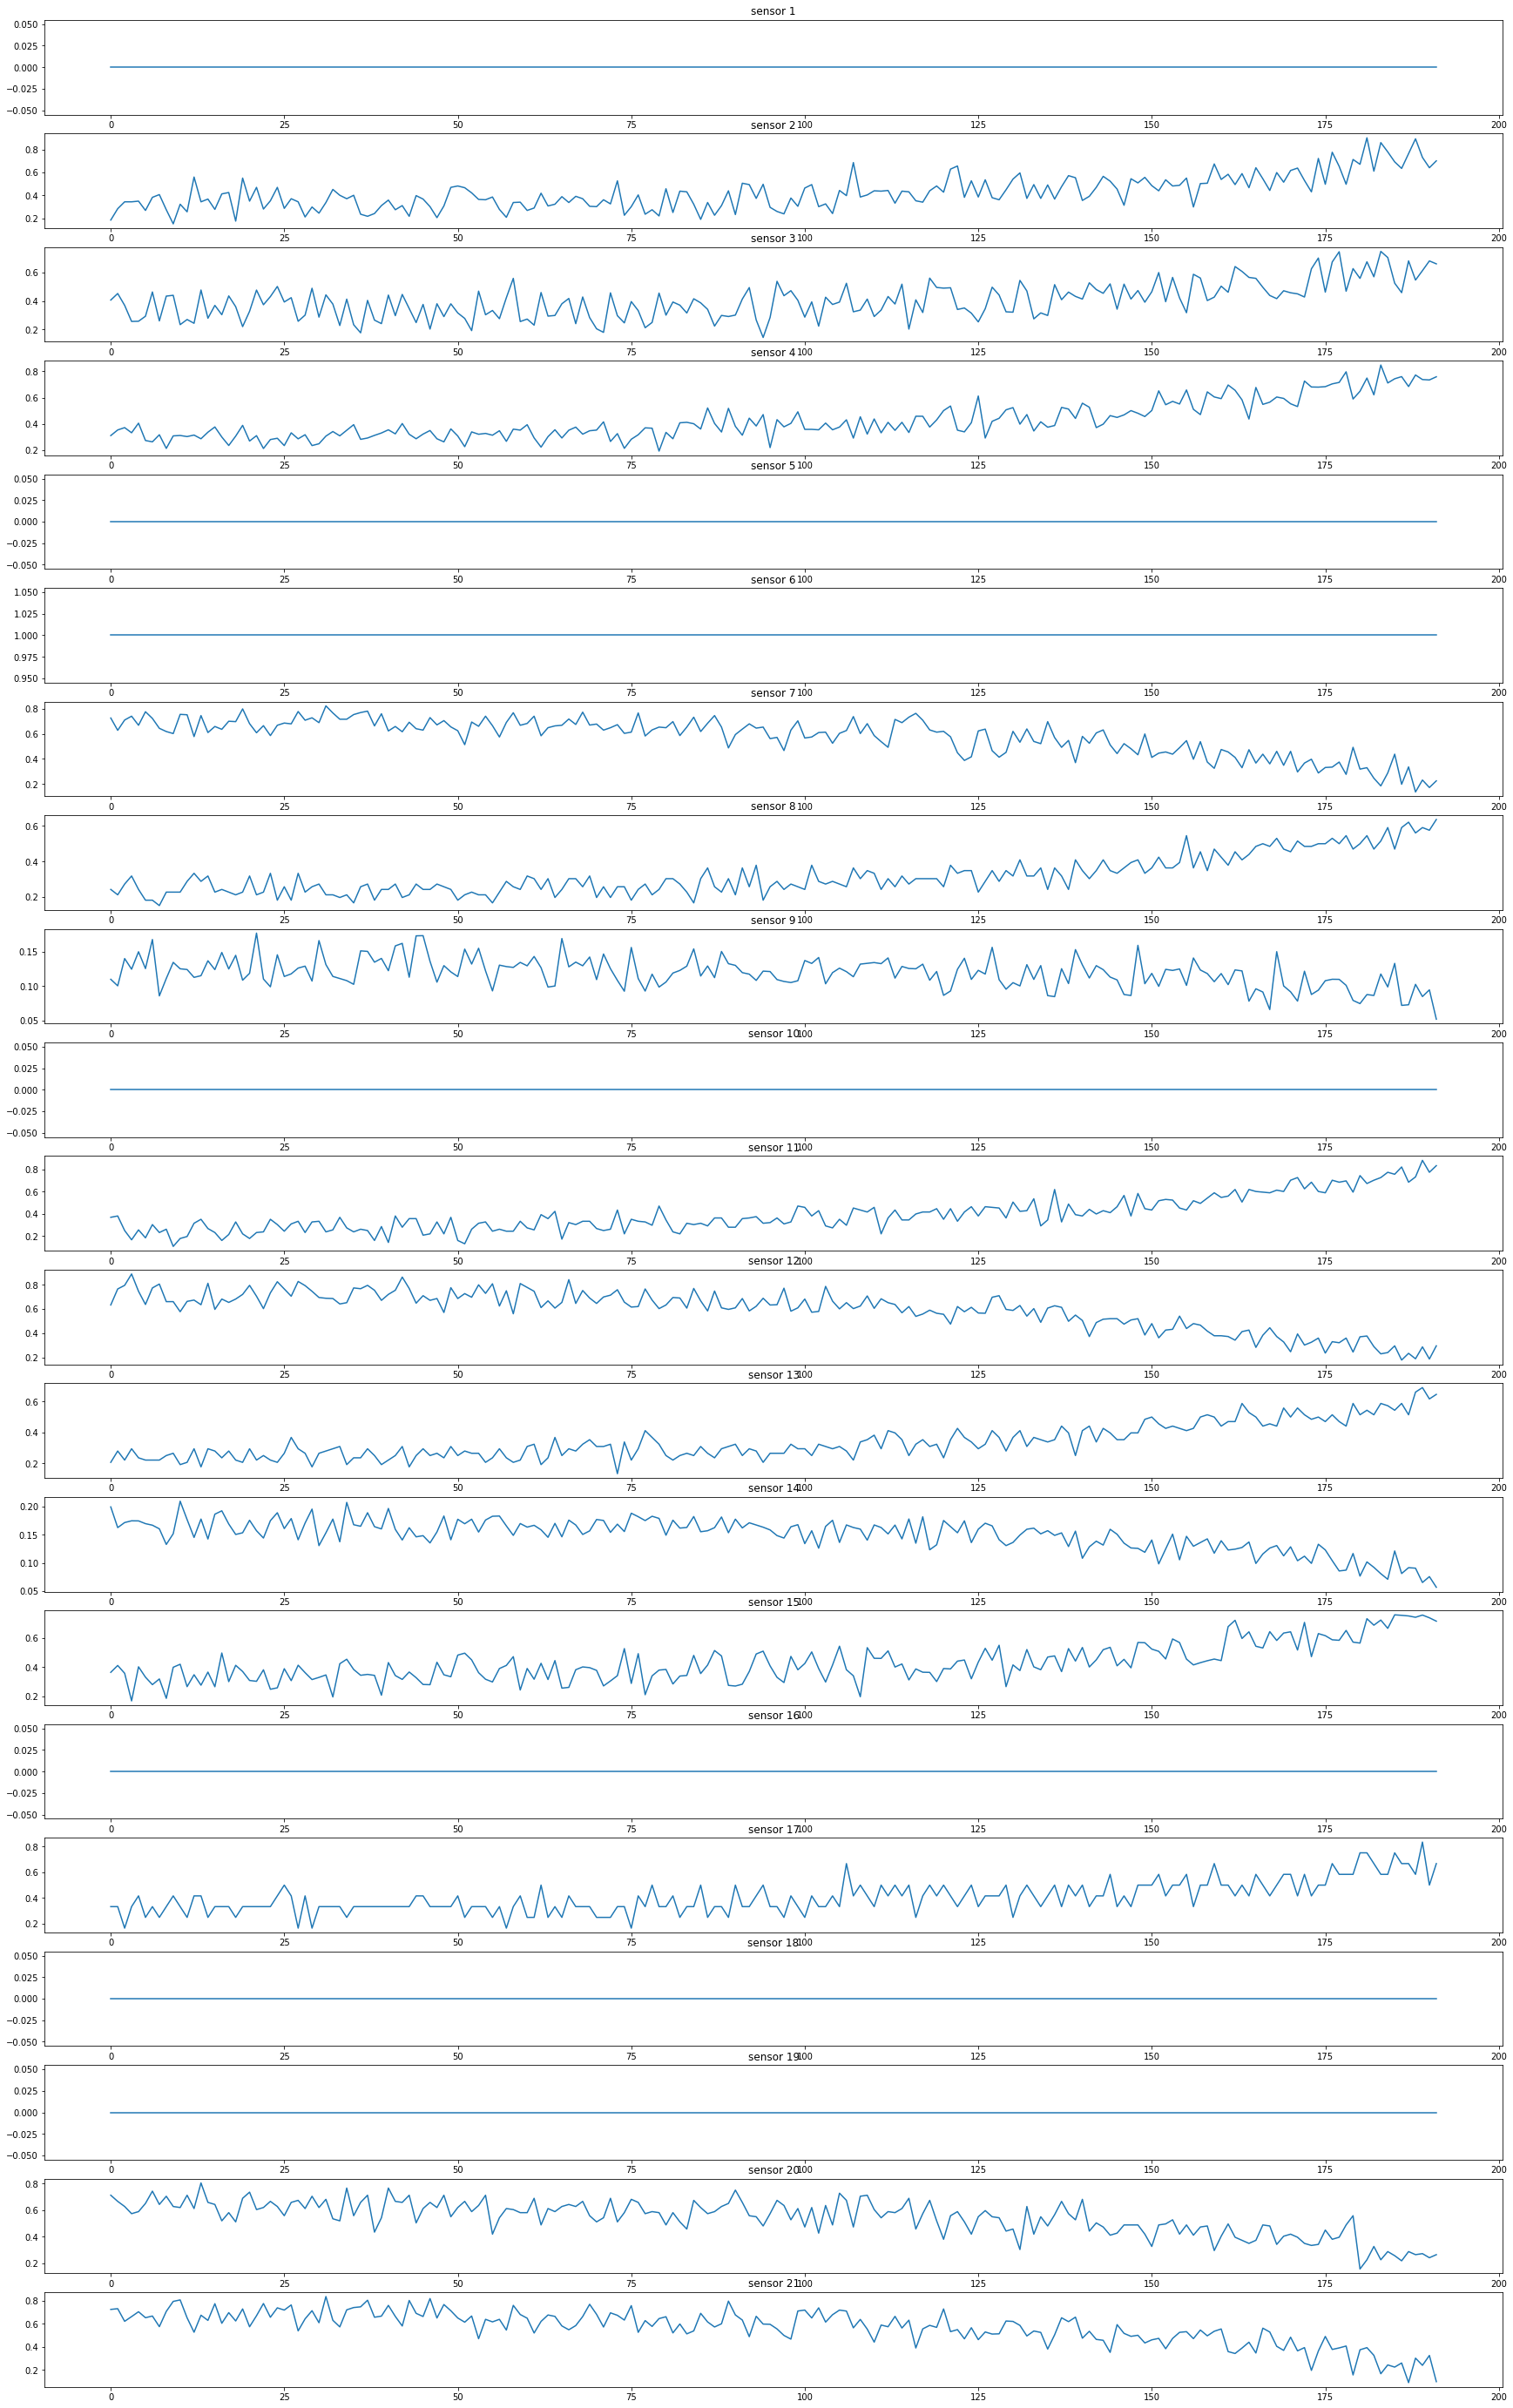

In [71]:
ojt_train = FD001_norm1.groupby('unit number').get_group(1)
ojt_train[col_name[5:]]

fig, ax = plt.subplots(21,1, figsize = (30,50))
for key, name in enumerate(col_name[5:]):
    ax[key].plot(ojt_train[name])
    ax[key].set_title(f"{name}")
plt.show()

In [110]:
unit_number1_bool = train[0]['unit number'] == 1
x = FD001_norm1[unit_number1_bool]
x = x.iloc[:,2:].ewm(alpha = 0.1).mean()
x

,op1,op2,op3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,0.538415,0.210526,0.0,0.0,0.236049,0.431127,0.332323,0.0,1.0,0.674549,...,0.702839,0.244582,0.180242,0.388895,0.0,0.333333,0.0,0.0,0.688698,0.728005
2,0.433049,0.409594,0.0,0.0,0.275652,0.408395,0.346421,0.0,1.0,0.687684,...,0.736961,0.235728,0.177124,0.377290,0.0,0.271833,0.0,0.0,0.666266,0.688658
3,0.464215,0.435883,0.0,0.0,0.295345,0.364127,0.341993,0.0,1.0,0.703112,...,0.781208,0.252707,0.176474,0.316026,0.0,0.289716,0.0,0.0,0.639333,0.681019
4,0.446289,0.410841,0.0,0.0,0.308544,0.338081,0.357288,0.0,1.0,0.694605,...,0.772676,0.248455,0.176049,0.337039,0.0,0.320717,0.0,0.0,0.627078,0.686753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.427362,0.547332,0.0,0.0,0.670672,0.585342,0.687106,0.0,1.0,0.333837,...,0.299239,0.525052,0.100401,0.660118,0.0,0.612104,0.0,0.0,0.326119,0.303689
188,0.431178,0.559266,0.0,0.0,0.693063,0.581593,0.695640,0.0,1.0,0.314141,...,0.288292,0.538723,0.099428,0.668520,0.0,0.609227,0.0,0.0,0.319864,0.303491
189,0.422543,0.561672,0.0,0.0,0.696949,0.584869,0.699844,0.0,1.0,0.305915,...,0.288247,0.553968,0.096008,0.677620,0.0,0.631637,0.0,0.0,0.315009,0.297072
190,0.430288,0.522172,0.0,0.0,0.691411,0.594662,0.703323,0.0,1.0,0.292554,...,0.278186,0.560336,0.093978,0.683925,0.0,0.618474,0.0,0.0,0.307539,0.299856


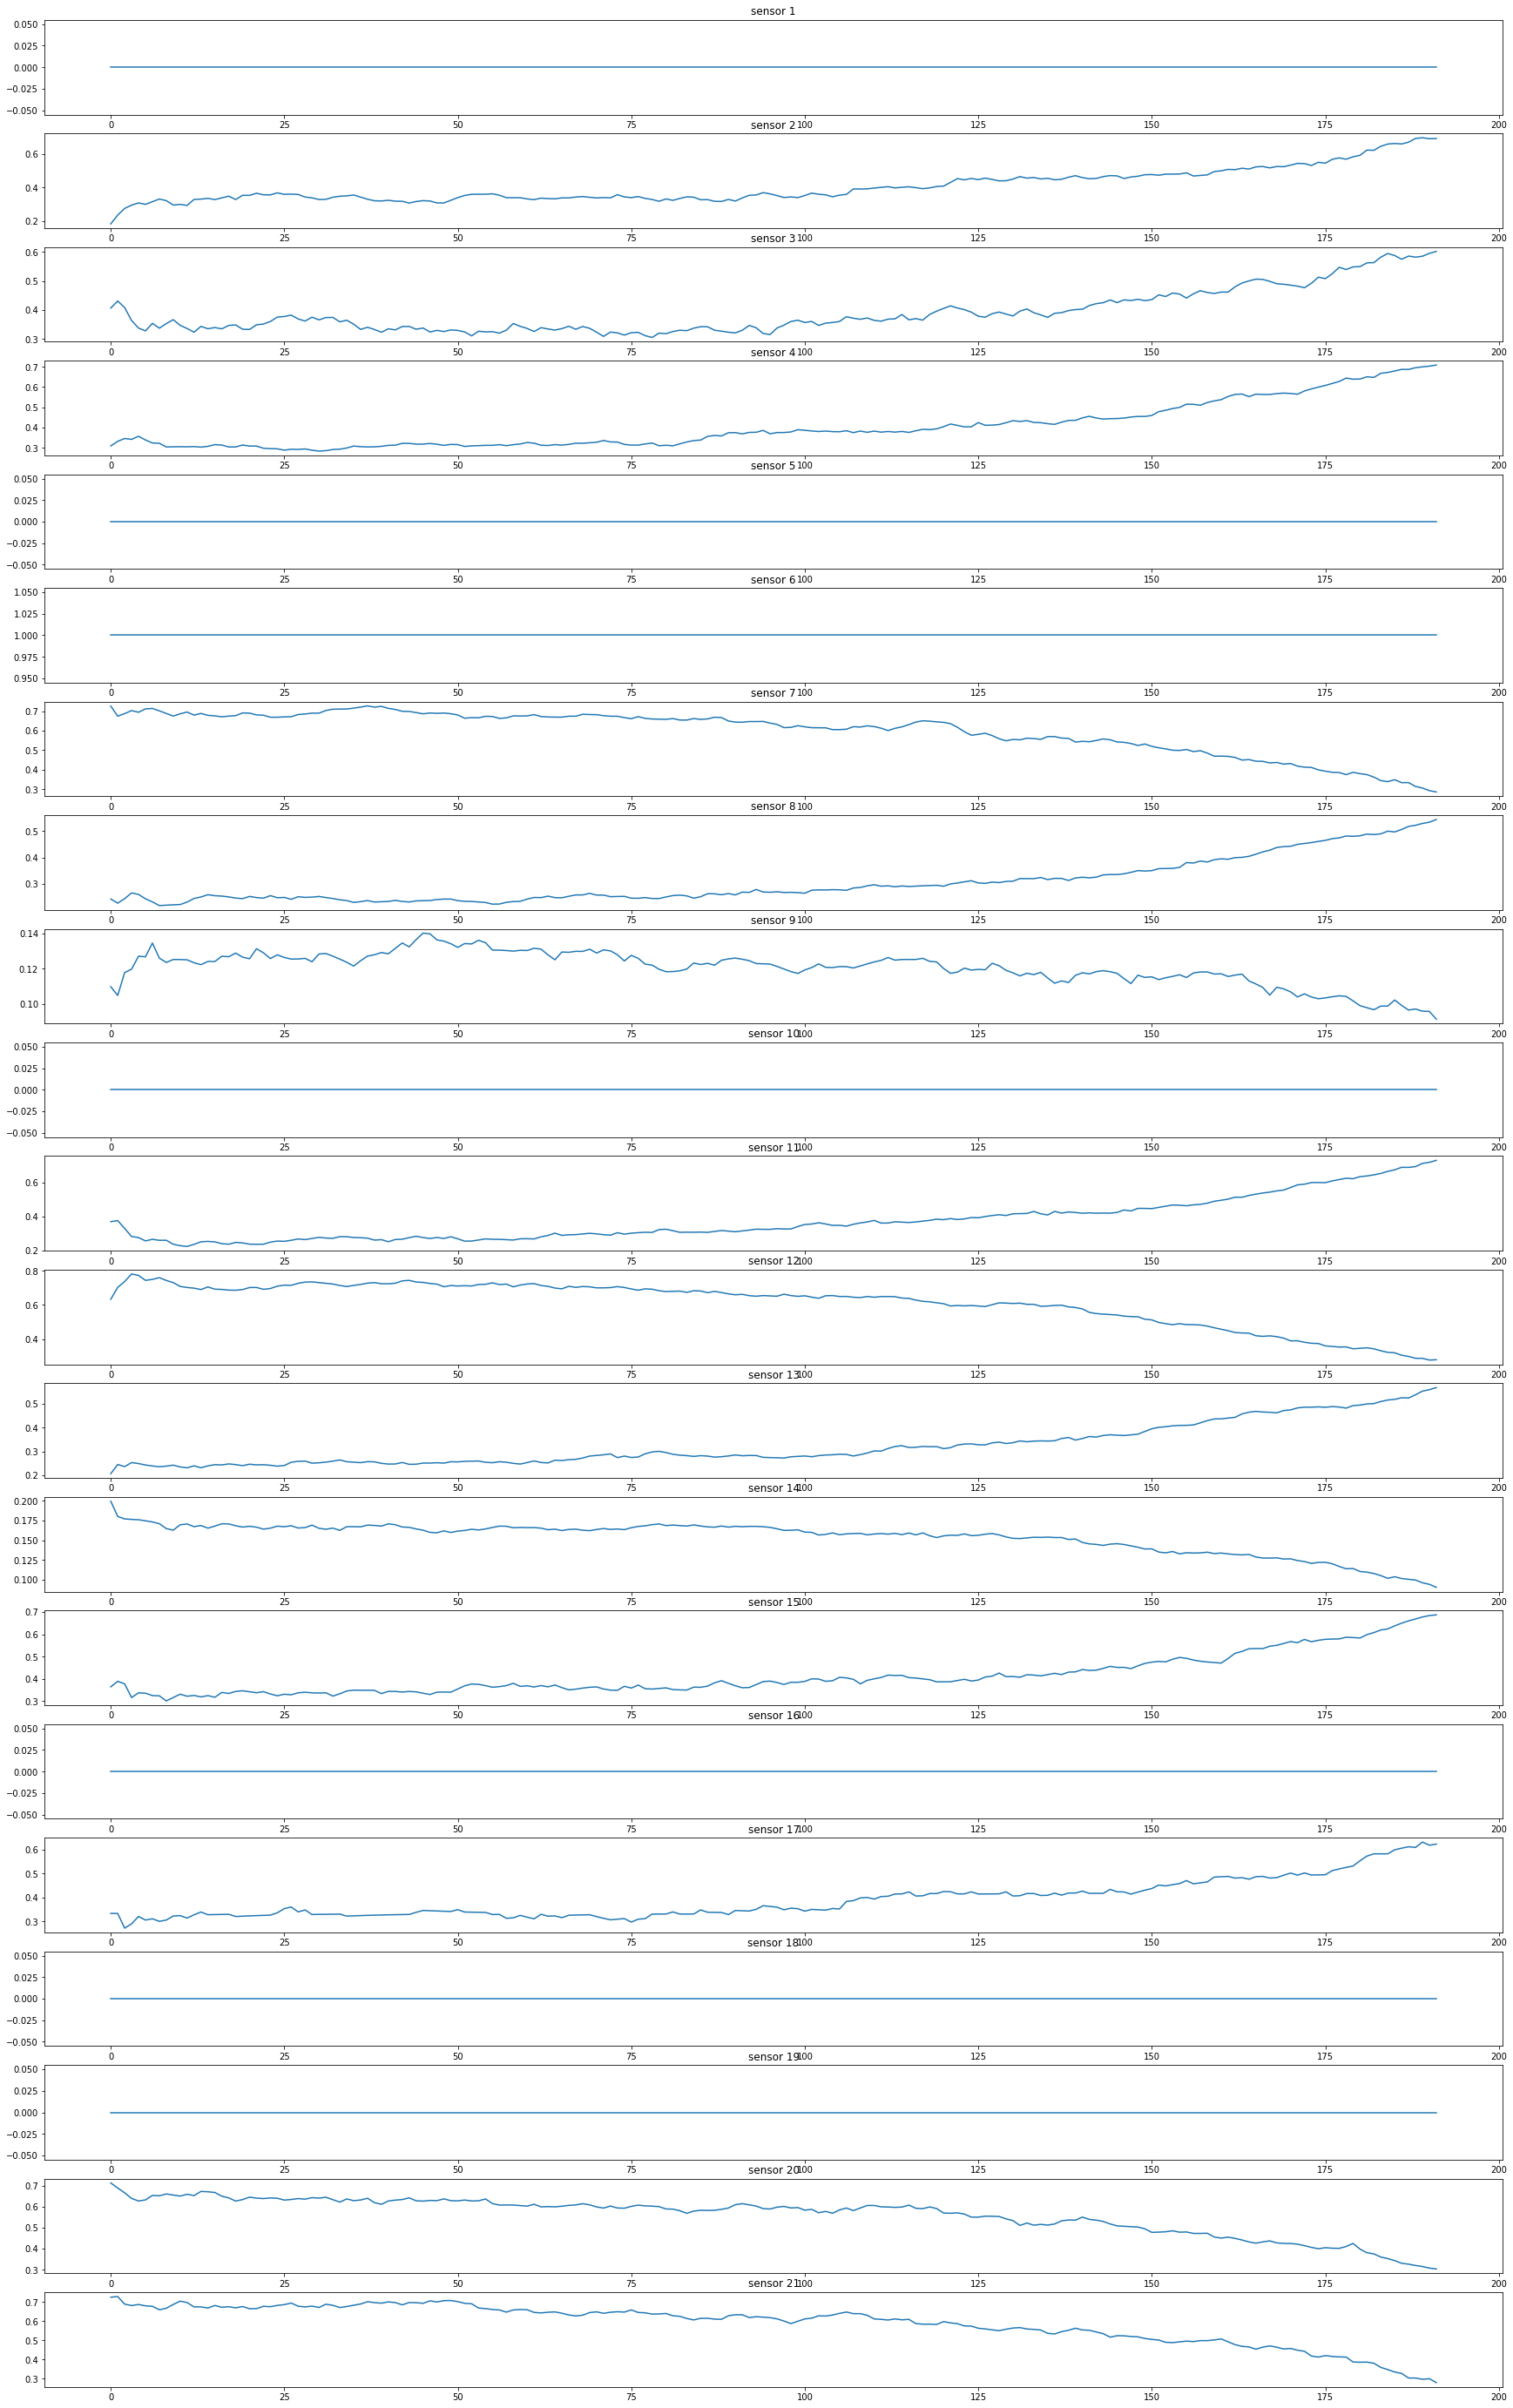

In [111]:
fig, ax = plt.subplots(21,1, figsize = (30,50))
for key, name in enumerate(col_name[5:]):
    ax[key].plot(x[name])
    ax[key].set_title(f"{name}")
plt.show()

In [112]:
#selected = [2, 3, 4, 7, 8, 11, 12, 13, 15, 17, 20, 21]
selected = [2, 3, 4, 8, 11, 13, 15, 17]
selected_sensor = ['sensor %d'%i for i in selected]
x[selected_sensor]

,sensor 2,sensor 3,sensor 4,sensor 8,sensor 11,sensor 13,sensor 15,sensor 17
0,0.183735,0.406802,0.309757,0.242424,0.369048,0.205882,0.363986,0.333333
1,0.236049,0.431127,0.332323,0.226475,0.375313,0.244582,0.388895,0.333333
2,0.275652,0.408395,0.346421,0.243542,0.329072,0.235728,0.377290,0.271833
3,0.295345,0.364127,0.341993,0.265246,0.281848,0.252707,0.316026,0.289716
4,0.308544,0.338081,0.357288,0.259673,0.275524,0.248455,0.337039,0.320717
...,...,...,...,...,...,...,...,...
187,0.670672,0.585342,0.687106,0.517484,0.687864,0.525052,0.660118,0.612104
188,0.693063,0.581593,0.695640,0.521796,0.692292,0.538723,0.668520,0.609227
189,0.696949,0.584869,0.699844,0.528707,0.711158,0.553968,0.677620,0.631637
190,0.691411,0.594662,0.703323,0.533412,0.717423,0.560336,0.683925,0.618474


In [113]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [114]:
temp = 0
for sensor in selected_sensor:
    temp += x[sensor]/len(selected_sensor)

In [115]:
temp

0      0.301871
1      0.321012
2      0.310992
3      0.300876
4      0.305665
         ...   
187    0.618218
188    0.625107
189    0.635594
190    0.637871
191    0.644375
Name: sensor 2, Length: 192, dtype: float64

In [116]:
import statsmodels.api as sm
from sklearn import linear_model

In [133]:
t = np.arange(192)
popt, pcov = curve_fit(func, t, temp, maxfev=60000)

In [134]:
popt

array([-2.34643346e+03,  6.34595583e-07,  2.34666723e+03])

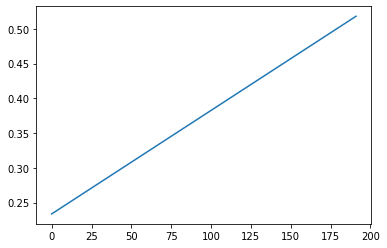

In [135]:
plt.plot(t, func(t,*popt))